- MapMycell annotation for AP19a_MERFISH, donor-ID:2724

In [1]:
import anndata
import h5py
import json
import numpy as np
import pandas as pd
import pathlib
import scanpy as sc

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

#### 1. Load the expression matrix

In [ ]:
# load the raw data

fl_path = r'./../../processed_data/scdata_MERFISH_BG.h5ad'
print(f'Running analysis for  {os.path.basename(fl_path)}')
adata = anndata.read_h5ad(fl_path)
adata

Running analysis for  scdata_MERFISH_BG.h5ad


AnnData object with n_obs × n_vars = 641405 × 769
    obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cmap', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
# get the Ensemble ID for the MERFISH genes 
import pandas as pd
codebook = pd.read_csv(r'./../../processed_data/Final_codebook_BG_673gn.csv',index_col=0)
genes = [gn for gn in codebook.index if 'blank' not in gn.lower()]
gene2EnsembleID = codebook.loc[genes,'id'].to_dict()

adata.var['Ensemble_ID'] = '-1'
adata.var.loc[adata.var_names,'Ensemble_ID'] = codebook.loc[adata.var_names,'id']
adata.var

n_cells_by_counts  mean_counts  log1p_mean_counts  \
ABCA8                 91448     0.207295           0.188382   
ABCG2                 18366     0.033867           0.033306   
ABI3BP                88551     0.327092           0.282990   
ABO                   51678     0.119084           0.112510   
ACOXL                 21100     0.037719           0.037025   
...                     ...          ...                ...   
Blank-92              22949     0.047084           0.046009   
Blank-93              29382     0.068013           0.065800   
Blank-94              20267     0.041900           0.041046   
Blank-95              13120     0.021721           0.021488   
Blank-96              17480     0.032671           0.032149   

          pct_dropout_by_counts  total_counts  log1p_total_counts  \
ABCA8                 87.807226        155475           11.954247   
ABCG2                 97.551259         25401           10.142583   
ABI3BP                88.193483        245325           12.410343   
ABO                   93.109765         89315           11.399936   
ACOXL                 97.186734         28290           10.250299   
...                         ...           ...                 ...   
Blank-92              96.940207         35314           10.472063   
Blank-93              96.082494         51011           10.839816   
Blank-94              97.297798         31426           10.355423   
Blank-95              98.250709         16291            9.698429   
Blank-96              97.669389         24504           10.106632   

              Ensemble_ID  
ABCA8     ENSG00000141338  
ABCG2     ENSG00000118777  
ABI3BP    ENSG00000154175  
ABO       ENSG00000175164  
ACOXL     ENSG00000153093  
...                   ...  
Blank-92               -1  
Blank-93               -1  
Blank-94               -1  
Blank-95               -1  
Blank-96               -1  

[769 rows x 7 columns]

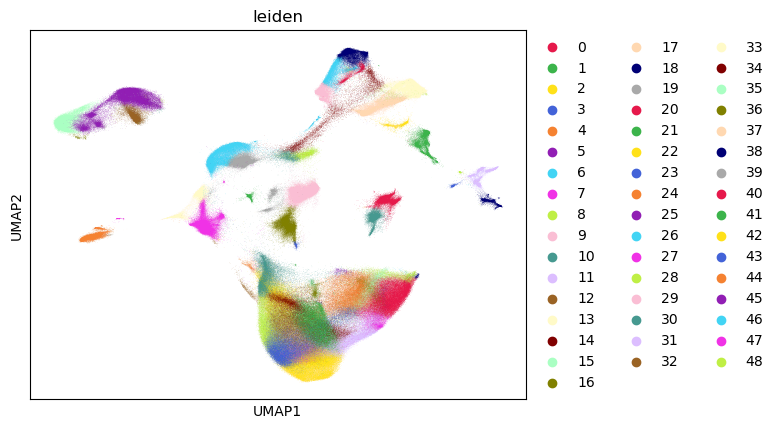

In [4]:
sc.pl.umap(adata,color= ['leiden'], palette = list(adata.uns['leiden_colors']))

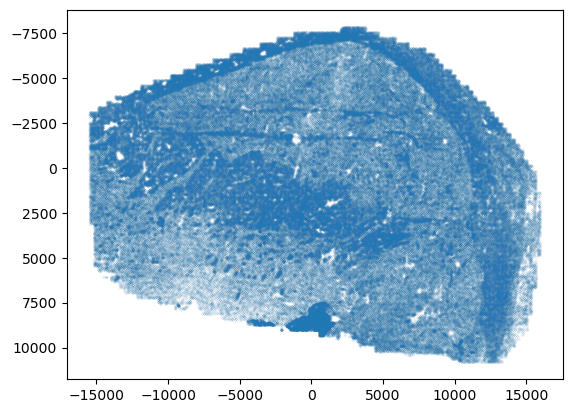

In [6]:
import matplotlib.pyplot as plt
plt.scatter(adata.obsm['X_spatial'][:,1],adata.obsm['X_spatial'][:,0], s = 0.001)
plt.gca().invert_yaxis()
plt.show()

- Save the input expression matrix for mapmycell

In [ ]:
# This is for single cell mapping 
# # save the expresssion matrix 
mapmycell_input = anndata.AnnData(adata.obsm['X_raw'])
# remove the blank genes 
keep = [x != '-1' for x in adata.var['Ensemble_ID']]
mapmycell_input= mapmycell_input[:,keep]

mapmycell_input.var = adata[:,keep].var.set_index('Ensemble_ID')
mapmycell_input.obs_names = adata.obs_names



In [9]:
mapmycell_input

AnnData object with n_obs × n_vars = 49 × 673
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [10]:
mapmycell_input.var

n_cells_by_counts  mean_counts  log1p_mean_counts  \
Ensemble_ID                                                          
ENSG00000141338              91448     0.207295           0.188382   
ENSG00000118777              18366     0.033867           0.033306   
ENSG00000154175              88551     0.327092           0.282990   
ENSG00000175164              51678     0.119084           0.112510   
ENSG00000153093              21100     0.037719           0.037025   
...                            ...          ...                ...   
ENSG00000136758              78514     0.193330           0.176748   
ENSG00000100027             177352     1.023725           0.704940   
ENSG00000184828              67111     0.191041           0.174828   
ENSG00000169554             496260     6.339912           1.993327   
ENSG00000169946              90924     0.243033           0.217554   

                 pct_dropout_by_counts  total_counts  log1p_total_counts  
Ensemble_ID                                                               
ENSG00000141338              87.807226        155475           11.954247  
ENSG00000118777              97.551259         25401           10.142583  
ENSG00000154175              88.193483        245325           12.410343  
ENSG00000175164              93.109765         89315           11.399936  
ENSG00000153093              97.186734         28290           10.250299  
...                                ...           ...                 ...  
ENSG00000136758              89.531718        145001           11.884503  
ENSG00000100027              76.353634        767812           13.551301  
ENSG00000184828              91.052081        143284           11.872591  
ENSG00000169554              33.833588       4755048           15.374718  
ENSG00000169946              87.877091        182279           12.113299  

[673 rows x 6 columns]

In [ ]:
os.makedirs(r'./processed_data', exist_ok=True)
mapmycell_input.write_h5ad(r'./processed_data/mapmycell_input_' + f'{os.path.basename(fl_path)}',compression = 'gzip')

#### 2. Map the unlabled_dataset to Allen snRNA-seq data

In [12]:
import sys
sys.path.append('/data/Bereket/cell_type_mapper/src')
from cell_type_mapper.cli.from_specified_markers import ( FromSpecifiedMarkersRunner)


In [ ]:
config = {
    'precomputed_stats': {
        'path': r'./../../HumanBG_scRNA_seq_Allen/Human.precomputed_stats.20250507.h5'
    },
    'query_markers': {
        'serialized_lookup': r'./../../HumanBG_scRNA_seq_Allen/Human.query_markers.20250507.json'
    },
    'type_assignment': {
        'bootstrap_factor': 0.5,
        'bootstrap_iteration': 100,
        'rng_seed': 661123,
        'n_processors': 1,
        'normalization': 'raw'
    },
    'query_path': r'./processed_data/mapmycell_input_' + f'{os.path.basename(fl_path)}',
    'extended_result_path': r'./processed_data/mapmycell_result_' + f'{os.path.basename(fl_path).split(".h5ad")[0]}.json',
    'csv_result_path': r'./processed_data/mapmycell_result_' + f'{os.path.basename(fl_path).split(".h5ad")[0]}.csv'
}

mapping_runner = FromSpecifiedMarkersRunner(
    args=[], input_data=config)

mapping_runner.run()

=== Running Hierarchical Mapping 1.5.1 with config ===
{
  "map_to_ensembl": false,
  "verbose_stdout": true,
  "nodes_to_drop": null,
  "type_assignment": {
    "n_processors": 1,
    "bootstrap_iteration": 100,
    "bootstrap_factor": 0.5,
    "bootstrap_factor_lookup": null,
    "chunk_size": 10000,
    "normalization": "raw",
    "rng_seed": 661123,
    "n_runners_up": 5,
    "min_markers": 10,
    "log_level": "ERROR"
  },
  "extended_result_path": "./processed_data/leidenMean_mapmycell_result_scdata_MERFISH_BG.json",
  "hdf5_result_path": null,
  "csv_result_path": "./processed_data/leidenMean_mapmycell_result_scdata_MERFISH_BG.csv",
  "summary_metadata_path": null,
  "obsm_key": null,
  "obsm_clobber": false,
  "verbose_csv": false,
  "query_path": "./processed_data/leidenMean_mapmycell_input_scdata_MERFISH_BG.h5ad",
  "drop_level": null,
  "tmp_dir": null,
  "extended_result_dir": null,
  "flatten": false,
  "max_gb": 100.0,
  "cloud_safe": false,
  "log_path": null,
  "precomp

/data/Bereket/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/data/Bereket/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: parent node 'CCN20250428_LEVEL_3/CS20250428_GROUP_0059' had too few markers in query set; augmenting with markers from ['CCN20250428_LEVEL_2/CS20250428_SUBCL_0015']
  warnings.warn(msg)
/data/Bereket/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: parent node 'CCN20250428_LEVEL_3/CS20250428_GROUP_0048' had too few markers in query set; augmenting with markers from ['CCN20250428_LEVEL_2/CS20250428_SUBCL_0001']
  warnings.warn(msg)
/data/Bereket/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: parent node 'CCN20250428_LEVEL_3/CS20250428_GROUP_0045' had too few markers in query set; augmenting with markers from ['CCN20250428_LEVEL

BENCHMARK: spent 9.0342e-02 seconds creating query marker cache
Running GPU implementation of type assignment.
Assignment: [1/1]  Time [ 5.023 ( 5.023)  5.023]   Data [ 2.704 ( 2.704)  2.704] 


[W527 22:11:13.844884103 CudaIPCTypes.cpp:16] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]


BENCHMARK: spent 7.3055e+00 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP


#### 3. Check the mapping results

In [ ]:
# check the mapping results.
import pandas as pd

cell_type_annotation = pd.read_csv(r'./processed_data/mapmycell_result_' + f'{os.path.basename(fl_path).split(".h5ad")[0]}.csv', header = 4)
cell_type_annotation['cell_id'] = cell_type_annotation['cell_id'].astype(str).astype('O')
cell_type_annotation = cell_type_annotation.set_index('cell_id')
cell_type_annotation

Neighborhood_label Neighborhood_name  \
cell_id                                            
0        CS20250428_NEIGH_0001         Nonneuron   
1        CS20250428_NEIGH_0001         Nonneuron   
2        CS20250428_NEIGH_0001         Nonneuron   
3        CS20250428_NEIGH_0001         Nonneuron   
4        CS20250428_NEIGH_0001         Nonneuron   
5        CS20250428_NEIGH_0002   Subpallium GABA   
6        CS20250428_NEIGH_0001         Nonneuron   
7        CS20250428_NEIGH_0001         Nonneuron   
8        CS20250428_NEIGH_0001         Nonneuron   
9        CS20250428_NEIGH_0002   Subpallium GABA   
10       CS20250428_NEIGH_0002   Subpallium GABA   
11       CS20250428_NEIGH_0001         Nonneuron   
12       CS20250428_NEIGH_0001         Nonneuron   
13       CS20250428_NEIGH_0001         Nonneuron   
14       CS20250428_NEIGH_0002   Subpallium GABA   
15       CS20250428_NEIGH_0001         Nonneuron   
16       CS20250428_NEIGH_0001         Nonneuron   
17       CS20250428_NEIGH_0001         Nonneuron   
18       CS20250428_NEIGH_0001         Nonneuron   
19       CS20250428_NEIGH_0002   Subpallium GABA   
20       CS20250428_NEIGH_0001         Nonneuron   
21       CS20250428_NEIGH_0002   Subpallium GABA   
22       CS20250428_NEIGH_0002   Subpallium GABA   
23       CS20250428_NEIGH_0001         Nonneuron   
24       CS20250428_NEIGH_0001         Nonneuron   
25       CS20250428_NEIGH_0002   Subpallium GABA   
26       CS20250428_NEIGH_0001         Nonneuron   
27       CS20250428_NEIGH_0001         Nonneuron   
28       CS20250428_NEIGH_0002   Subpallium GABA   
29       CS20250428_NEIGH_0001         Nonneuron   
30       CS20250428_NEIGH_0001         Nonneuron   
31       CS20250428_NEIGH_0001         Nonneuron   
32       CS20250428_NEIGH_0002   Subpallium GABA   
33       CS20250428_NEIGH_0001         Nonneuron   
34       CS20250428_NEIGH_0001         Nonneuron   
35       CS20250428_NEIGH_0002   Subpallium GABA   
36       CS20250428_NEIGH_0001         Nonneuron   
37       CS20250428_NEIGH_0002   Subpallium GABA   
38       CS20250428_NEIGH_0002   Subpallium GABA   
39       CS20250428_NEIGH_0001         Nonneuron   
40       CS20250428_NEIGH_0001         Nonneuron   
41       CS20250428_NEIGH_0002   Subpallium GABA   
42       CS20250428_NEIGH_0001         Nonneuron   
43       CS20250428_NEIGH_0002   Subpallium GABA   
44       CS20250428_NEIGH_0001         Nonneuron   
45       CS20250428_NEIGH_0001         Nonneuron   
46       CS20250428_NEIGH_0001         Nonneuron   
47       CS20250428_NEIGH_0001         Nonneuron   
48       CS20250428_NEIGH_0001         Nonneuron   

         Neighborhood_bootstrapping_probability            Class_label  \
cell_id                                                                  
0                                          0.77  CS20250428_CLASS_0010   
1                                          1.00  CS20250428_CLASS_0010   
2                                          0.97  CS20250428_CLASS_0010   
3                                          1.00  CS20250428_CLASS_0010   
4                                          1.00  CS20250428_CLASS_0010   
5                                          1.00  CS20250428_CLASS_0003   
6                                          1.00  CS20250428_CLASS_0010   
7                                          1.00  CS20250428_CLASS_0011   
8                                          1.00  CS20250428_CLASS_0010   
9                                          1.00  CS20250428_CLASS_0003   
10                                         1.00  CS20250428_CLASS_0003   
11                                         0.97  CS20250428_CLASS_0000   
12                                         1.00  CS20250428_CLASS_0010   
13                                         0.88  CS20250428_CLASS_0010   
14                                         1.00  CS20250428_CLASS_0003   
15                                         1.00  CS20250428_CLASS_0010   
16                         

In [57]:
import anndata
mapmycell_input = anndata.read_h5ad(r'./processed_data/mapmycell_input_' + f'{os.path.basename(fl_path)}')

In [58]:
cell_type_annotation.index

Index(['Conv_zscan__1610--2', 'Conv_zscan__1610--3', 'Conv_zscan__1610--5',
       'Conv_zscan__1610--6', 'Conv_zscan__1610--11', 'Conv_zscan__1610--13',
       'Conv_zscan__1610--15', 'Conv_zscan__1610--17', 'Conv_zscan__1610--19',
       'Conv_zscan__1610--27',
       ...
       'Conv_zscan__5015--283', 'Conv_zscan__5015--284',
       'Conv_zscan__5015--285', 'Conv_zscan__5015--286',
       'Conv_zscan__5015--287', 'Conv_zscan__5015--302',
       'Conv_zscan__5015--307', 'Conv_zscan__5015--308',
       'Conv_zscan__5015--315', 'Conv_zscan__5015--321'],
      dtype='object', name='cell_id', length=641405)

In [59]:
mapmycell_input.obs = mapmycell_input.obs.join(cell_type_annotation[['Class_label','Class_name','Class_bootstrapping_probability','Subclass_label','Subclass_name','Subclass_bootstrapping_probability','Group_label','Group_name','Group_bootstrapping_probability']])

In [60]:
cell_type_annotation[['Class_label','Class_name','Class_bootstrapping_probability','Subclass_label','Subclass_name','Subclass_bootstrapping_probability','Group_label','Group_name','Group_bootstrapping_probability']]

Class_label   Class_name  \
cell_id                                                     
Conv_zscan__1610--2    CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__1610--3    CS20250428_CLASS_0005  CN MGE GABA   
Conv_zscan__1610--5    CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__1610--6    CS20250428_CLASS_0011     Vascular   
Conv_zscan__1610--11   CS20250428_CLASS_0011     Vascular   
...                                      ...          ...   
Conv_zscan__5015--302  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--307  CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__5015--308  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--315  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--321  CS20250428_CLASS_0010    OPC-Oligo   

                       Class_bootstrapping_probability         Subclass_label  \
cell_id                                                                         
Conv_zscan__1610--2                               0.84  CS20250428_SUBCL_0000   
Conv_zscan__1610--3                               0.98  CS20250428_SUBCL_0008   
Conv_zscan__1610--5                               1.00  CS20250428_SUBCL_0000   
Conv_zscan__1610--6                               0.97  CS20250428_SUBCL_0023   
Conv_zscan__1610--11                              0.94  CS20250428_SUBCL_0011   
...                                                ...                    ...   
Conv_zscan__5015--302                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--307                             0.77  CS20250428_SUBCL_0000   
Conv_zscan__5015--308                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--315                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--321                             1.00  CS20250428_SUBCL_0022   

                         Subclass_name  Subclass_bootstrapping_probability  \
cell_id                                                                      
Conv_zscan__1610--2          Astrocyte                                1.00   
Conv_zscan__1610--3       CN ST18 GABA                                0.98   
Conv_zscan__1610--5          Astrocyte                                0.81   
Conv_zscan__1610--6           Pericyte                                0.94   
Conv_zscan__1610--11              Endo                                0.99   
...                                ...                                 ...   
Conv_zscan__5015--302  Oligodendrocyte                                0.84   
Conv_zscan__5015--307        Astrocyte                                1.00   
Conv_zscan__5015--308  Oligodendrocyte                                1.00   
Conv_zscan__5015--315  Oligodendrocyte                                1.00   
Conv_zscan__5015--321  Oligodendrocyte                                0.99   

                                 Group_label               Group_name  \
cell_id                                                                 
Conv_zscan__1610--2    CS20250428_GROUP_0017                  ImAstro   
Conv_zscan__1610--3    CS20250428_GROUP_0040  STR FS PTHLH-PVALB GABA   
Conv_zscan__1610--5    CS20250428_GROUP_0039                Astrocyte   
Conv_zscan__1610--6    CS20250428_GROUP_0027                 Pericyte   
Conv_zscan__1610--11   CS20250428_GROUP_0011                     Endo   
...                                      ...                      ...   
Conv_zscan__5015--302  CS20250428_GROUP_0026            Oligo PLEKHG1   
Conv_zscan__5015--307  CS20250428_GROUP_0039                Astrocyte   
Conv_zscan__5015--308  CS20250428_GROUP_0025             Oligo OPALIN   
Conv_zscan__5015--315  CS20250428_GROUP_0025             Oligo OPALIN   
Conv_zscan__5015--321  CS20250428_GROUP_0018                  ImOligo   

                       Group_bootstrapping_probability  
cell_id                                                 
Conv_zscan__1610--2                               0.52  
Conv_zscan__1610--3                              

In [62]:
mapmycell_input.obsm['X_spatial'] = adata[mapmycell_input.obs_names].obsm['X_spatial']

In [63]:
import numpy as np
np.unique(mapmycell_input.obs['Class_name'] )

array(['Astro-Epen', 'CN CGE GABA', 'CN LGE GABA', 'CN MGE GABA',
       'Cx GABA', 'F M GABA', 'F M Glut', 'Immune', 'M Dopa', 'OPC-Oligo',
       'Vascular'], dtype=object)

In [64]:
mapmycell_input.obs['Class_name'].value_counts()

Class_name
OPC-Oligo      321676
CN LGE GABA    117645
Astro-Epen     100910
Vascular        67228
Immune          17754
CN MGE GABA      9212
Cx GABA          4262
CN CGE GABA      1469
F M GABA         1174
F M Glut           57
M Dopa             18
Name: count, dtype: int64

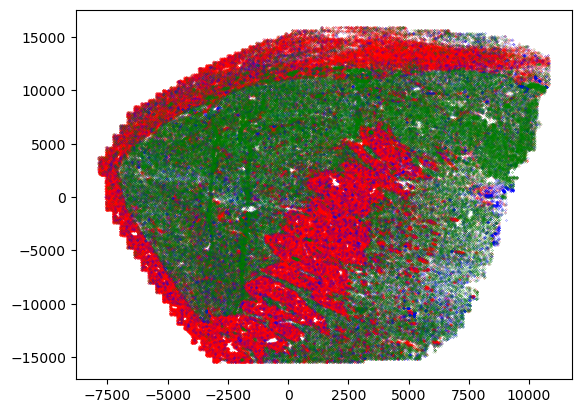

In [66]:
import matplotlib.pyplot as plt
keep_olig = mapmycell_input.obs['Class_name'] == 'OPC-Oligo'
keep_Vascular = mapmycell_input.obs['Class_name'] == 'Vascular'
keep_MSN = mapmycell_input.obs['Class_name'] ==  'CN LGE GABA'

plt.scatter(mapmycell_input[keep_olig].obsm['X_spatial'][:,0],mapmycell_input[keep_olig].obsm['X_spatial'][:,1], s = 0.01, c = 'r')
plt.scatter(mapmycell_input[keep_Vascular].obsm['X_spatial'][:,0],mapmycell_input[keep_Vascular].obsm['X_spatial'][:,1], s = 0.01, c = 'b')
plt.scatter(mapmycell_input[keep_MSN].obsm['X_spatial'][:,0],mapmycell_input[keep_MSN].obsm['X_spatial'][:,1], s = 0.01, c = 'g')
plt.show()

-  Check the spatial map of the labeled cells

In [10]:
def plot_cluster_scdata(scdata,cmap,all_clusters,clusters=[1,2],bg_color = 'gray',bg_pt_size = 5, point_sz = 25, transpose=1,flipx=1,flipy=1,hue_input = 'leiden' , ax = None,use_seaborn = False,show_title = True):
    """
    plot spatial location of cell cluster using either seaborn or matplotlib
    use seaborn for individual clusters
    use matplotlib scatter function to visualize all clusters
    cmap - dictionary that has color of each cluster  used in umap
    """
    fig = None
    if not ax:
     fig,ax = plt.subplots(figsize=(15, 15),)# facecolor="black")

    
    if use_seaborn:
        x,y,hue = 'x', 'y',hue_input
        sns.scatterplot(x=x, y=y, data=scdata.obs, 
                        s=bg_pt_size, markers=dict(marker_edge_color='none'),
                        rasterized=True,
                        ax=ax,c= bg_color)
    else: # use matplotlib
        x,y = (np.array(scdata.obs[['x', 'y']])*[flipx,flipy])[:,::transpose].T
        ax.scatter(x, y, c=bg_color, s = bg_pt_size, marker='.')
        
    for cluster in clusters:
        clst_idx = all_clusters.index(cluster)
        cluster_ = str(cluster)
        inds = scdata.obs[hue_input] == cluster_
        
        #col = cmap[int(clst_idx) % len(cmap)]
        col = cmap[cluster_] # cmap is dictionary
        
        if use_seaborn:
            sns.scatterplot(x=x, y=y, data=scdata.obs[inds], 
                        s=point_sz, markers=dict(marker_edge_color='none'),
                        rasterized=True,
                        ax=ax,c= col)
            if show_title:
                ax.set_title(f'cluster {cluster_}',fontsize = 7, y= 1)
        else:
            x_ = x[inds]
            y_ = y[inds]
            ax.scatter(x_, y_, c=col, s= point_sz, marker='.',label = cluster_)
        
        
    
    # ax.set_xlim([x.min(),x.max()])
    # ax.set_ylim([y.min(),y.max()])
    ax.grid(False)
    ax.axis("off")
    ax.axis("equal")
    if fig:
        ax.legend( loc = 'lower center', ncol = len(clusters)//3,markerscale = 12, title = 'Clusters',facecolor = 'black',
            labelcolor = 'white')
        ax.set_title(np.unique(scdata.obs['sample'])[0])
    else:
        # ax.legend( loc = 'lower center')
        pass
        
    ax.autoscale(enable=True, tight=True)
    
   

In [79]:
#### rotate the sections by some degree manually
def rotate(spatial_x,deg):
    """
    spatial_X: Nx2 matrix
    deg: rotation degree in radian
    
    """
    deg = np.deg2rad(deg)
    rotation_mat = np.array([[np.cos(deg),-1*np.sin(deg)],
                            [np.sin(deg),np.cos(deg)]])
    return np.matmul(spatial_x,rotation_mat)

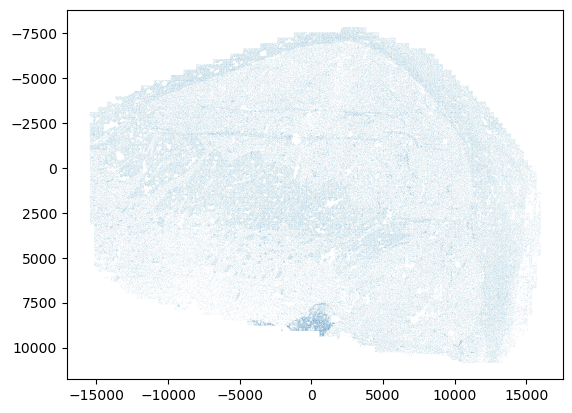

In [96]:
import seaborn as sns
fig,ax  = plt.subplots(1,1,dpi = 100)

sns.scatterplot(x =mapmycell_input.obsm['X_spatial'][:,1],y= mapmycell_input.obsm['X_spatial'][:,0],s  = 0.01,ax = ax)
ax.invert_yaxis()
plt.show()

In [129]:
deg = -8.5
spatial_rot = rotate(mapmycell_input.obsm['X_spatial'].toarray(),deg)


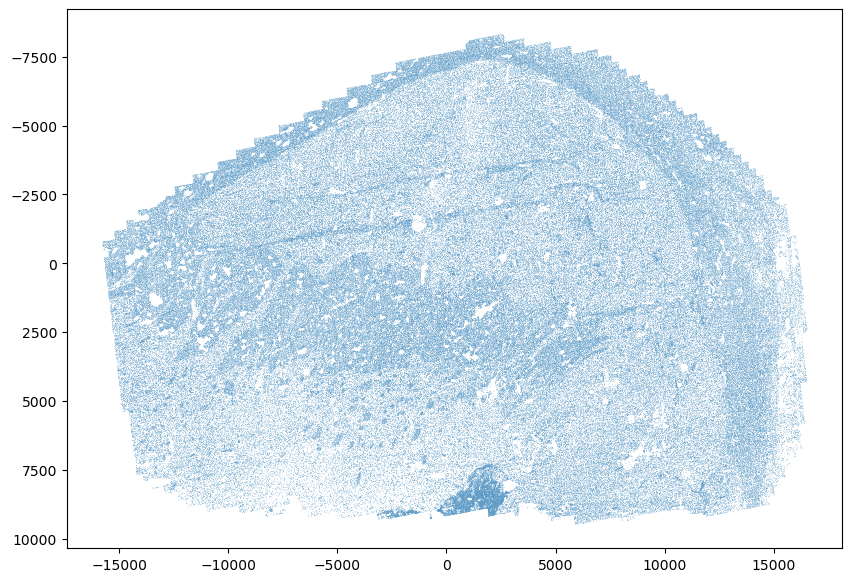

In [130]:
import seaborn as sns
fig,ax  = plt.subplots(1,1,dpi = 100,figsize = (10,7))

sns.scatterplot(x =spatial_rot[:,1],y= spatial_rot[:,0],s  = 0.1,ax = ax)
ax.invert_yaxis()
plt.show()

In [131]:
# update Y and X with the rotated coordinates
mapmycell_input.obs[['y','x']] = spatial_rot.copy()
mapmycell_input.obs

Class_label   Class_name  \
Conv_zscan__1610--2    CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__1610--3    CS20250428_CLASS_0005  CN MGE GABA   
Conv_zscan__1610--5    CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__1610--6    CS20250428_CLASS_0011     Vascular   
Conv_zscan__1610--11   CS20250428_CLASS_0011     Vascular   
...                                      ...          ...   
Conv_zscan__5015--302  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--307  CS20250428_CLASS_0000   Astro-Epen   
Conv_zscan__5015--308  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--315  CS20250428_CLASS_0010    OPC-Oligo   
Conv_zscan__5015--321  CS20250428_CLASS_0010    OPC-Oligo   

                       Class_bootstrapping_probability         Subclass_label  \
Conv_zscan__1610--2                               0.84  CS20250428_SUBCL_0000   
Conv_zscan__1610--3                               0.98  CS20250428_SUBCL_0008   
Conv_zscan__1610--5                               1.00  CS20250428_SUBCL_0000   
Conv_zscan__1610--6                               0.97  CS20250428_SUBCL_0023   
Conv_zscan__1610--11                              0.94  CS20250428_SUBCL_0011   
...                                                ...                    ...   
Conv_zscan__5015--302                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--307                             0.77  CS20250428_SUBCL_0000   
Conv_zscan__5015--308                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--315                             1.00  CS20250428_SUBCL_0022   
Conv_zscan__5015--321                             1.00  CS20250428_SUBCL_0022   

                         Subclass_name  Subclass_bootstrapping_probability  \
Conv_zscan__1610--2          Astrocyte                                1.00   
Conv_zscan__1610--3       CN ST18 GABA                                0.98   
Conv_zscan__1610--5          Astrocyte                                0.81   
Conv_zscan__1610--6           Pericyte                                0.94   
Conv_zscan__1610--11              Endo                                0.99   
...                                ...                                 ...   
Conv_zscan__5015--302  Oligodendrocyte                                0.84   
Conv_zscan__5015--307        Astrocyte                                1.00   
Conv_zscan__5015--308  Oligodendrocyte                                1.00   
Conv_zscan__5015--315  Oligodendrocyte                                1.00   
Conv_zscan__5015--321  Oligodendrocyte                                0.99   

                                 Group_label               Group_name  \
Conv_zscan__1610--2    CS20250428_GROUP_0017                  ImAstro   
Conv_zscan__1610--3    CS20250428_GROUP_0040  STR FS PTHLH-PVALB GABA   
Conv_zscan__1610--5    CS20250428_GROUP_0039                Astrocyte   
Conv_zscan__1610--6    CS20250428_GROUP_0027                 Pericyte   
Conv_zscan__1610--11   CS20250428_GROUP_0011                     Endo   
...                                      ...                      ...   
Conv_zscan__5015--302  CS20250428_GROUP_0026            Oligo PLEKHG1   
Conv_zscan__5015--307  CS20250428_GROUP_0039                Astrocyte   
Conv_zscan__5015--308  CS20250428_GROUP_0025             Oligo OPALIN   
Conv_zscan__5015--315  CS20250428_GROUP_0025             Oligo OPALIN   
Conv_zscan__5015--321  CS20250428_GROUP_0018                  ImOligo   

                       Group_bootstrapping_probability            x  \
Conv_zscan__1610--2                               0.52 -7008.779887   
Conv_zscan__1610--3                               0.99 -7078.948320   
Conv_zscan__1610--5                               0.71 -7061.285238   
Conv_zscan__1610--6                               1.00 -6971.044215   
Conv_zscan__1610--11                              1.00 -6960.359044   
...                                                ...          ...   
Conv_zscan__5015

In [99]:
cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

In [100]:
keep =  mapmycell_input.obs['Class_name'] == 'CN LGE GABA'
np.unique(mapmycell_input[keep].obs['Group_name'])

array(['GPe MEIS2-SOX6 GABA', 'OT D1 ICj', 'STR D1D2 Hybrid MSN',
       'STRd D1 Matrix MSN', 'STRd D1 Striosome MSN',
       'STRd D2 Matrix MSN', 'STRd D2 StrioMat Hybrid MSN',
       'STRd D2 Striosome MSN', 'STRv D1 MSN', 'STRv D1 NUDAP MSN',
       'STRv D2 MSN'], dtype=object)

In [119]:
adata

AnnData object with n_obs × n_vars = 641405 × 769
    obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'Neighborhood_label', 'Neighborhood_name', 'Neighborhood_bootstrapping_probability', 'Class_label', 'Class_name', 'Class_bootstrapping_probability', 'Subclass_label', 'Subclass_name', 'Subclass_bootstrapping_probability', 'Group_label', 'Group_name', 'Group_bootstrapping_probability', 'Cluster_label', 'Cluster_name', 'Cluster_alias', 'Cluster_bootstrapping_probability'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'Ensemble_ID'
    uns: 'cmap', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'Class_name_colors', 'Subclass_name_colors', 'Group_name_colors'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'X_spatial_rotated'
    obsp: 'connectivities', 'distances'

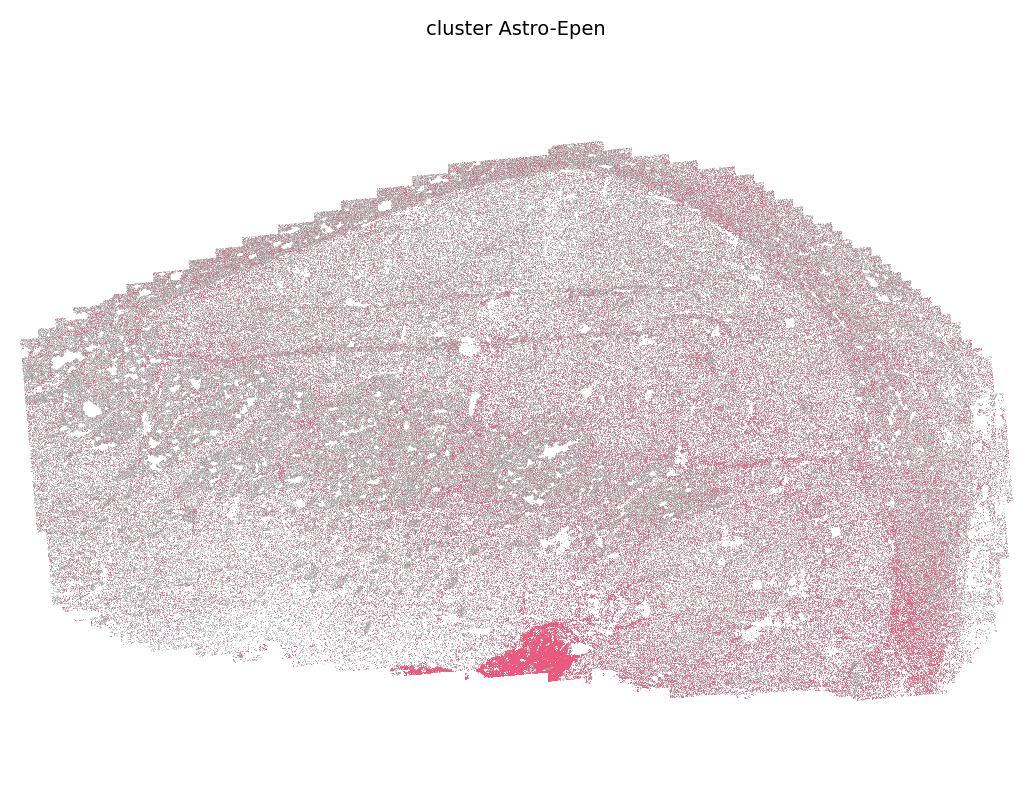

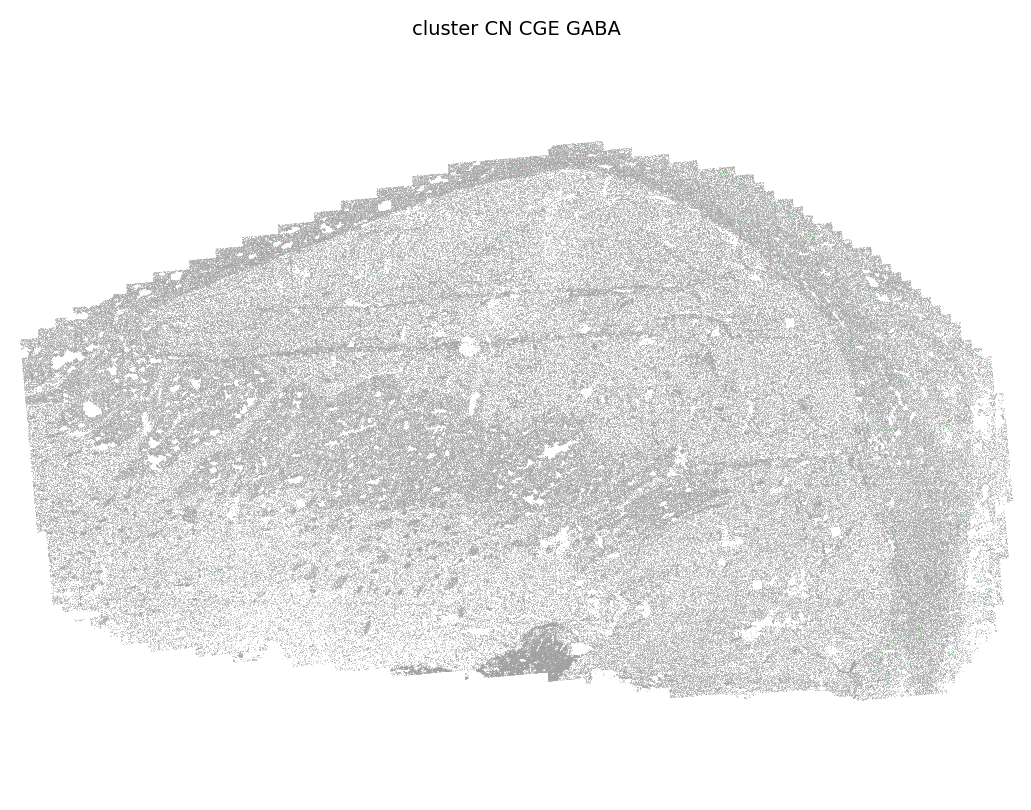

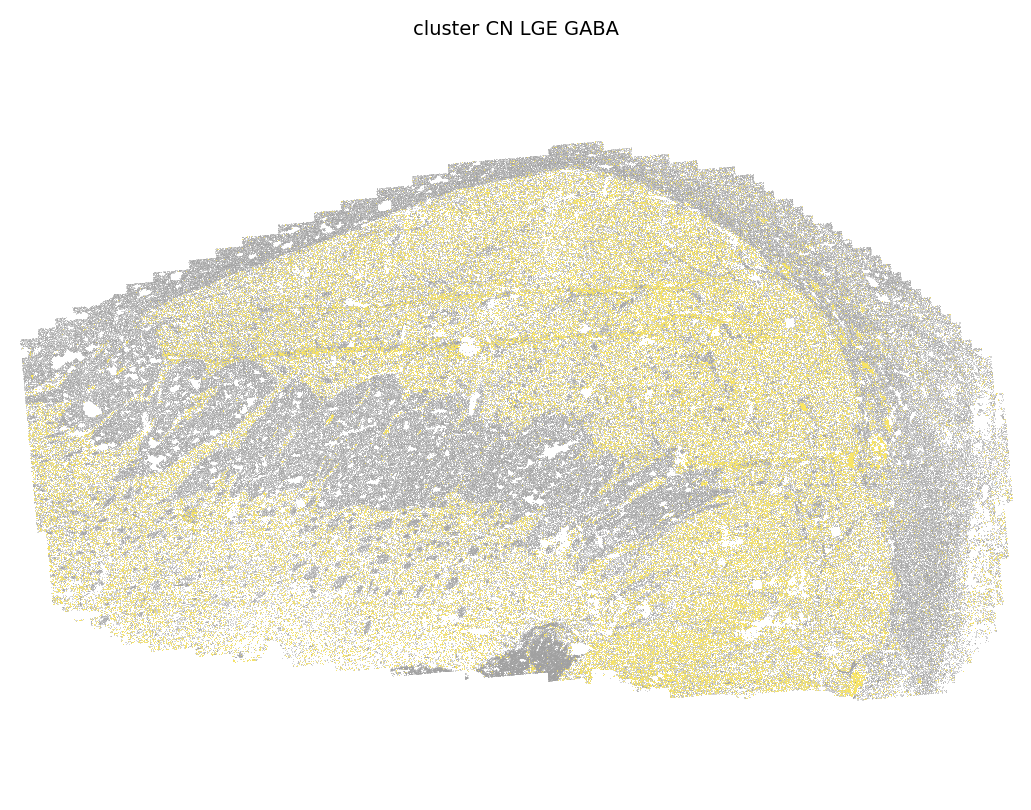

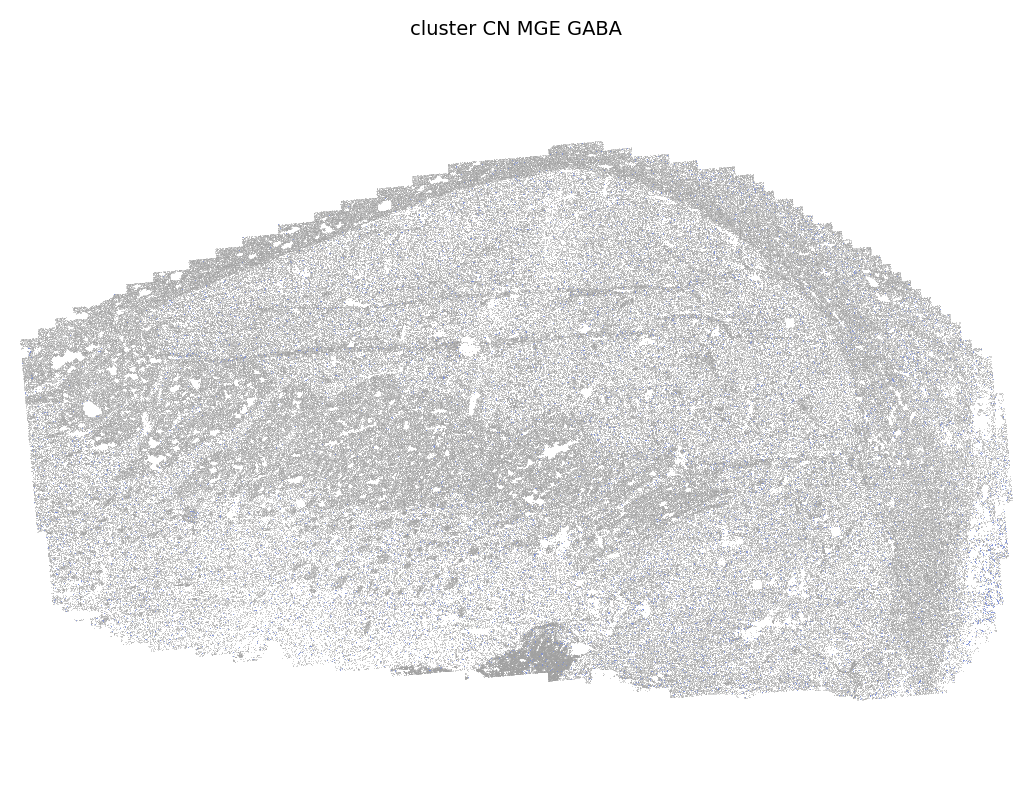

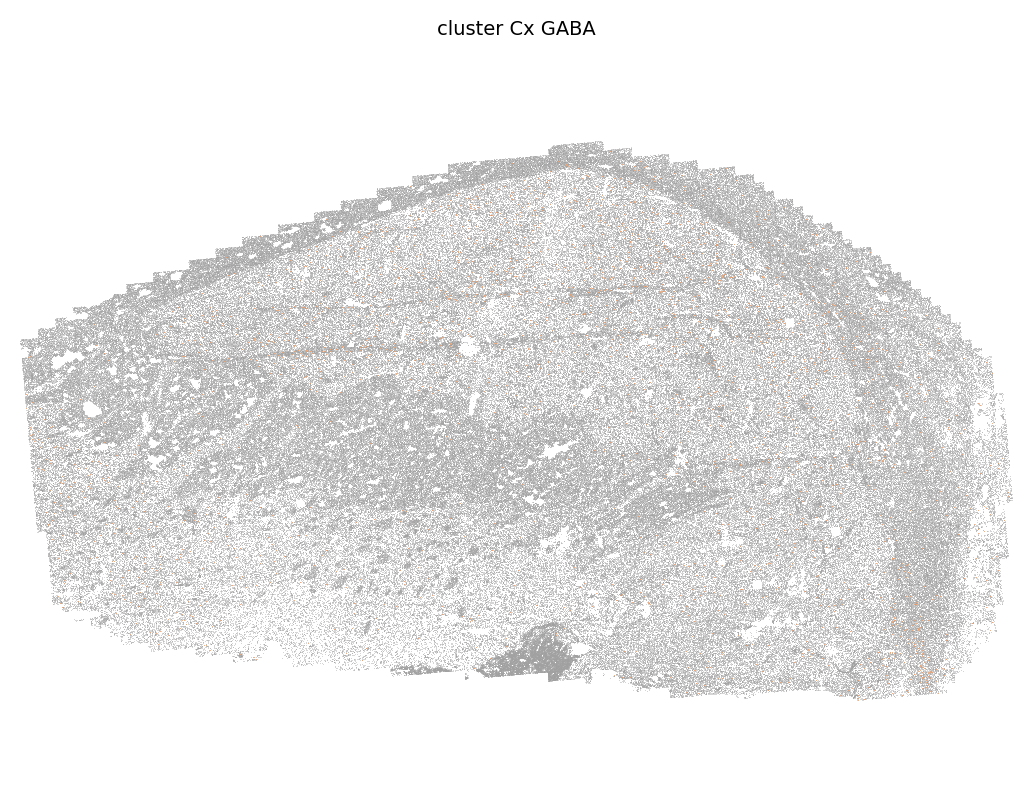

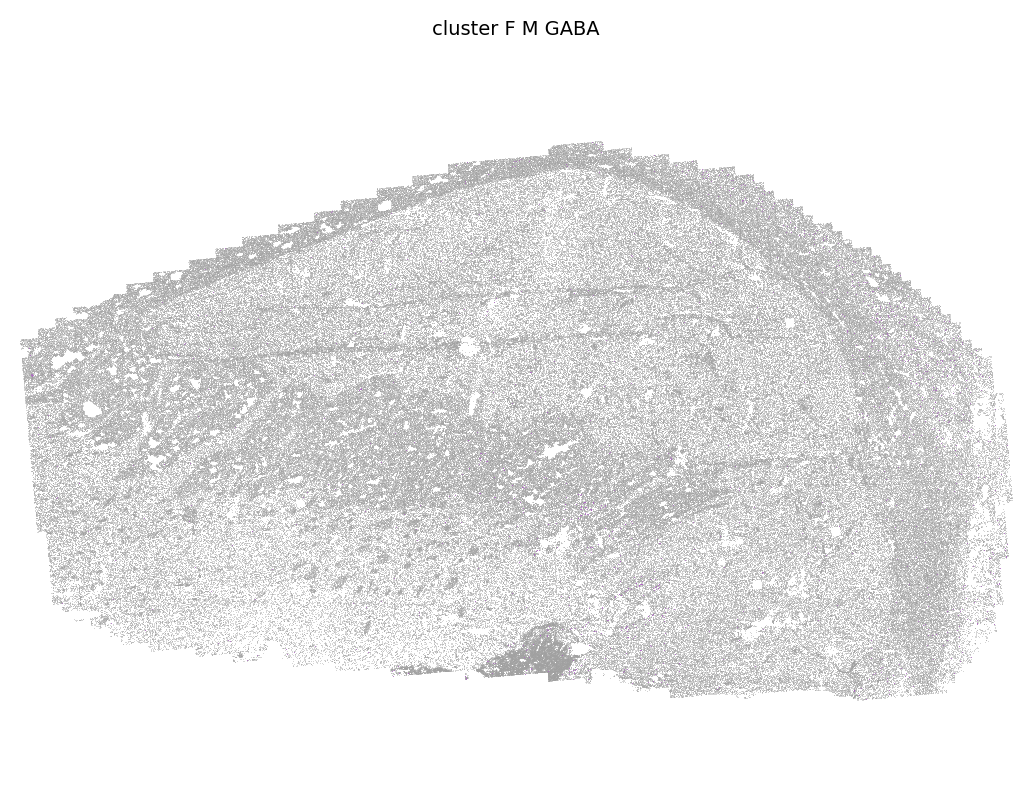

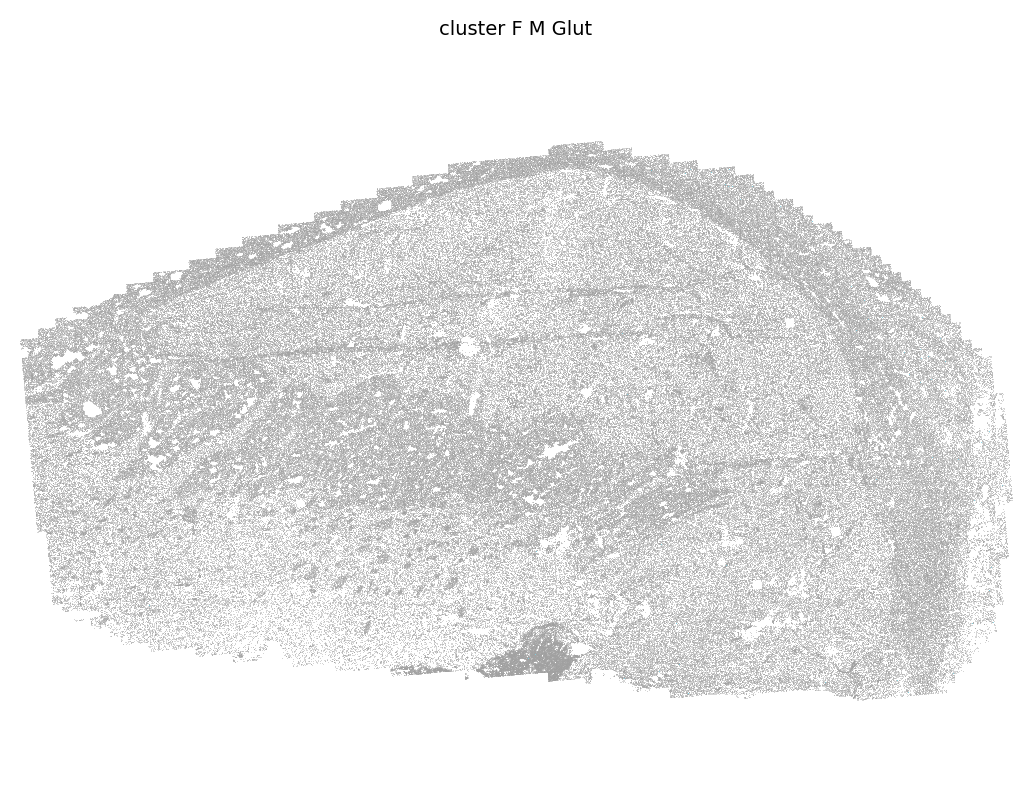

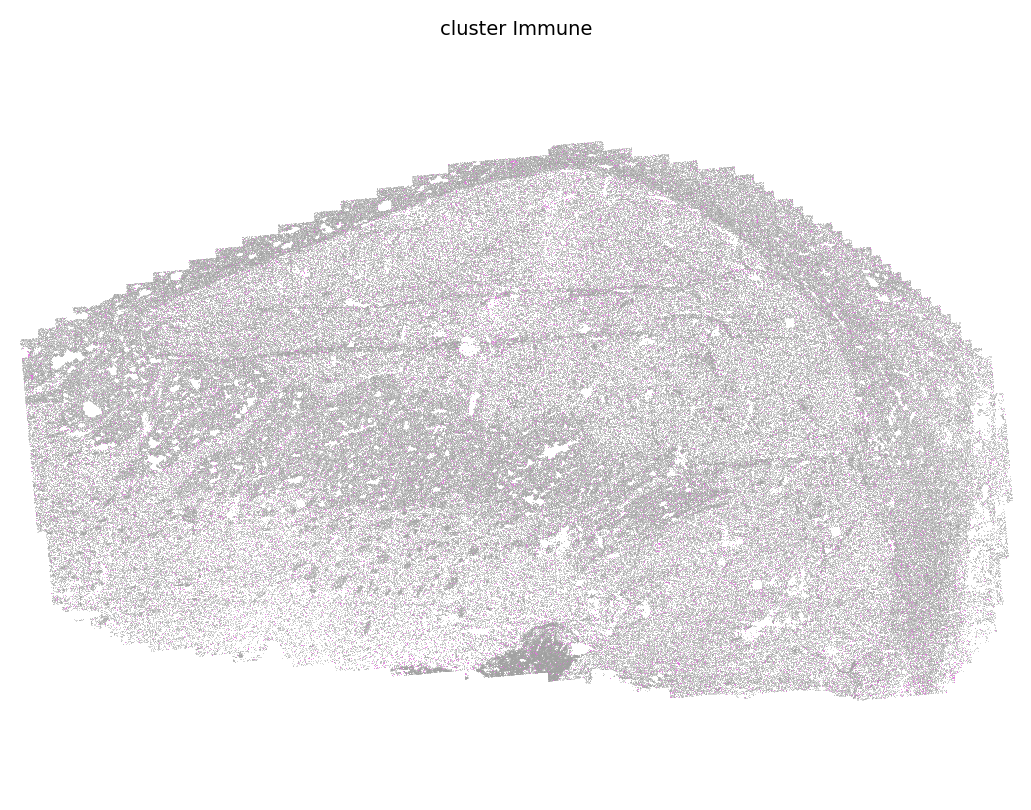

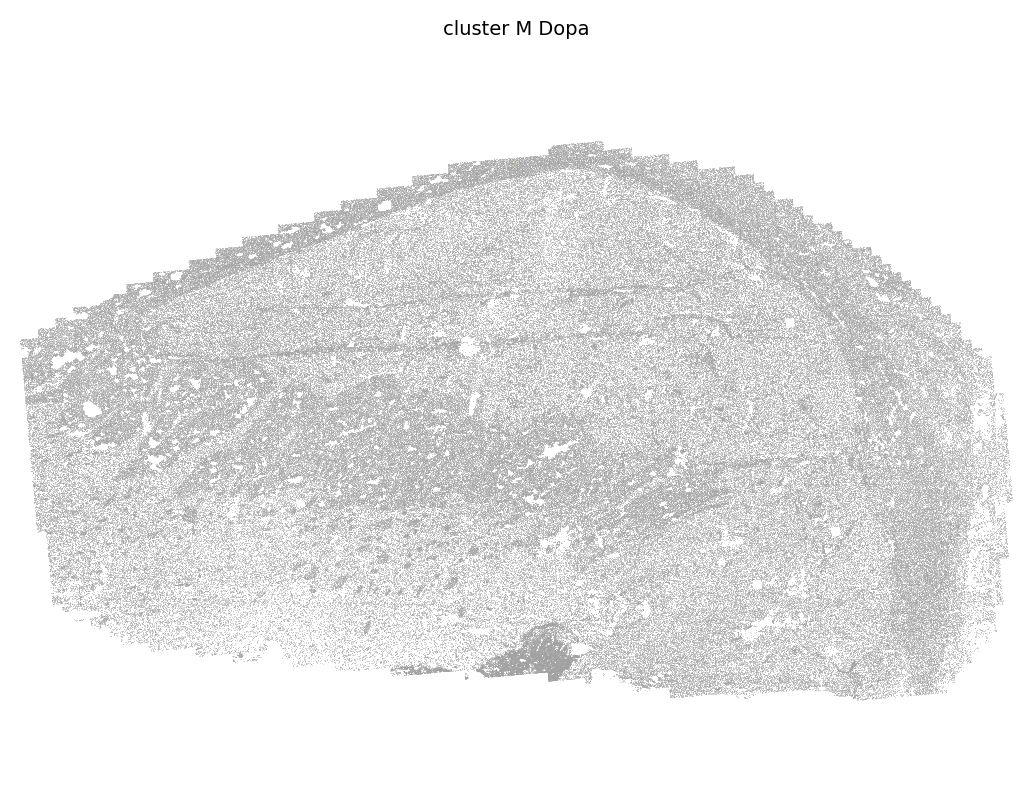

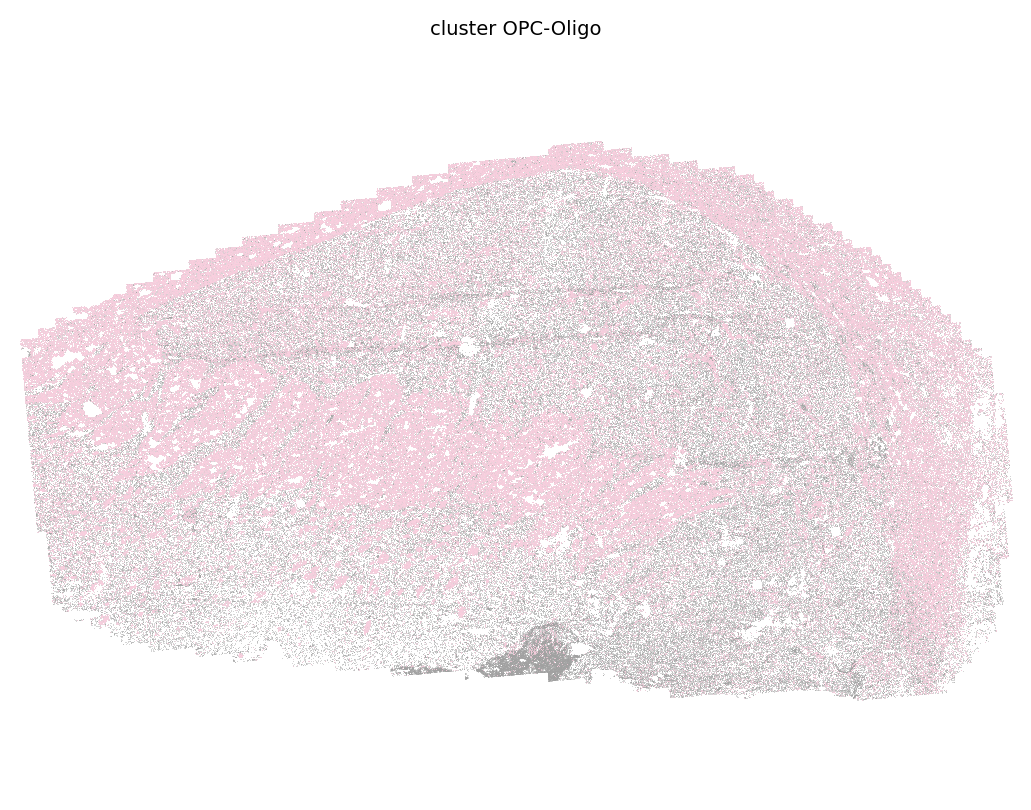

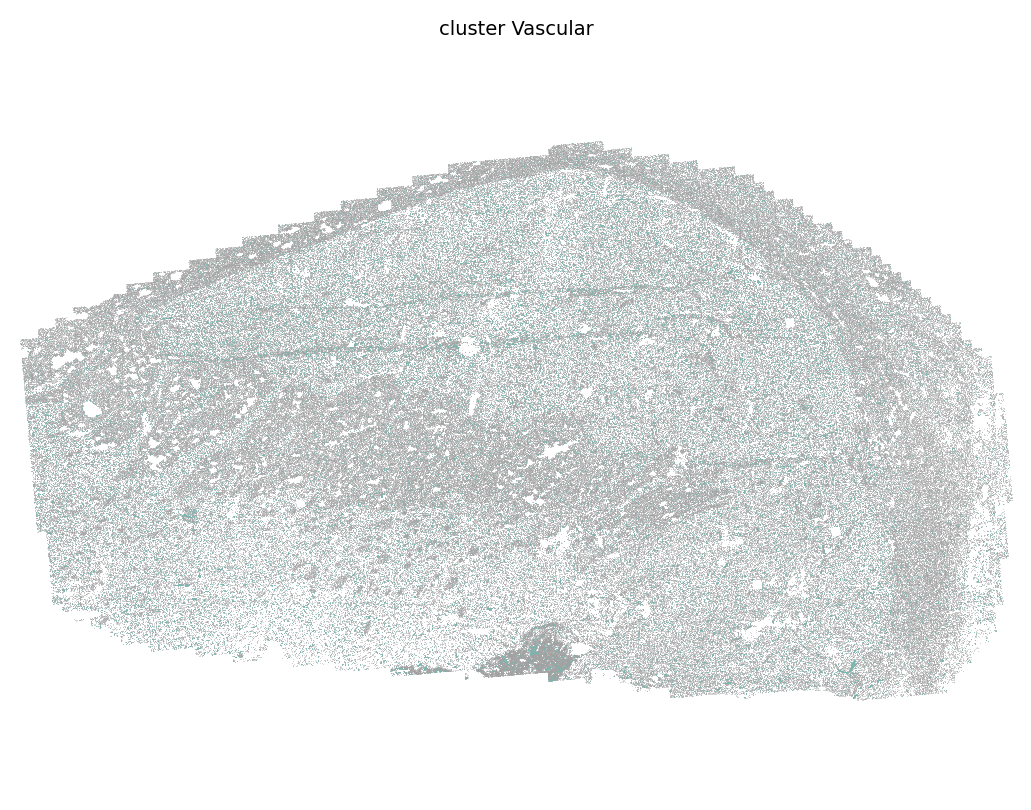

In [ ]:
import seaborn as sns
clusters = list(np.unique(mapmycell_input.obs['Class_name']))
cluster_cmap = {c:cmap[i%len(cmap)] for i,c in enumerate(clusters)}


for clst in np.unique(mapmycell_input.obs['Class_name']):
    fig,ax = plt.subplots(1,1, dpi = 200)
    plot_cluster_scdata(mapmycell_input,cluster_cmap,clusters,clusters=[clst],bg_pt_size = 0.06,point_sz = 0.1,ax = ax,use_seaborn = True,hue_input = 'Class_name')
    ax.invert_yaxis()
    plt.show()


#### 4. check alignment with UMAP

In [103]:
adata.obs = adata.obs.join(cell_type_annotation)

In [104]:
adata.obs.columns

Index(['volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'leiden', 'Neighborhood_label',
       'Neighborhood_name', 'Neighborhood_bootstrapping_probability',
       'Class_label', 'Class_name', 'Class_bootstrapping_probability',
       'Subclass_label', 'Subclass_name', 'Subclass_bootstrapping_probability',
       'Group_label', 'Group_name', 'Group_bootstrapping_probability',
       'Cluster_label', 'Cluster_name', 'Cluster_alias',
       'Cluster_bootstrapping_probability'],
      dtype='object')

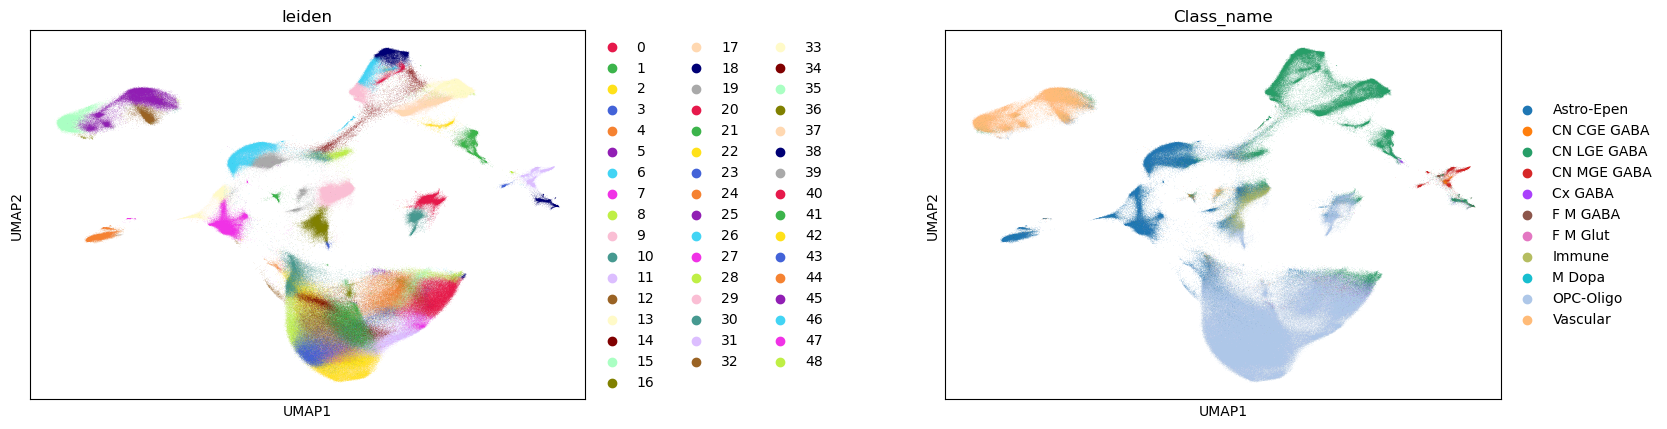

In [107]:
sc.pl.umap(adata, color = ['leiden','Class_name'],wspace = 0.5)

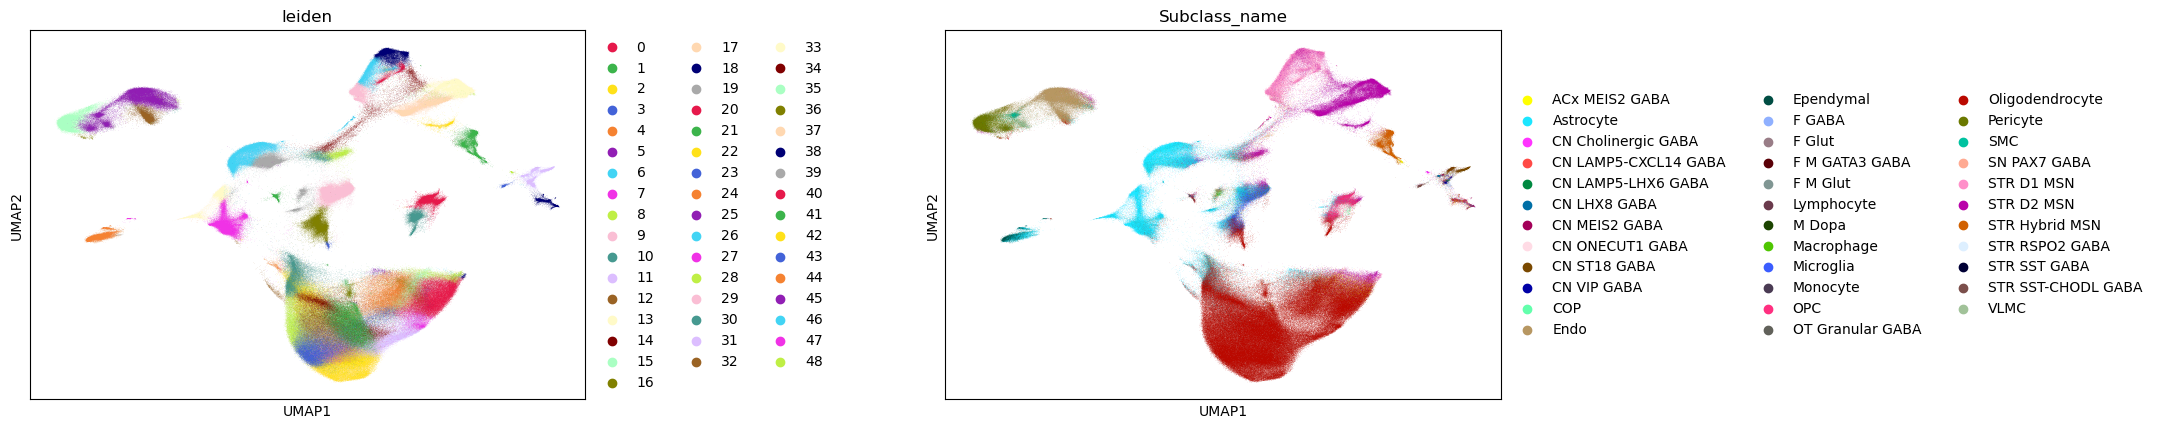

In [109]:
sc.pl.umap(adata, color = ['leiden','Subclass_name'],wspace = 0.5)

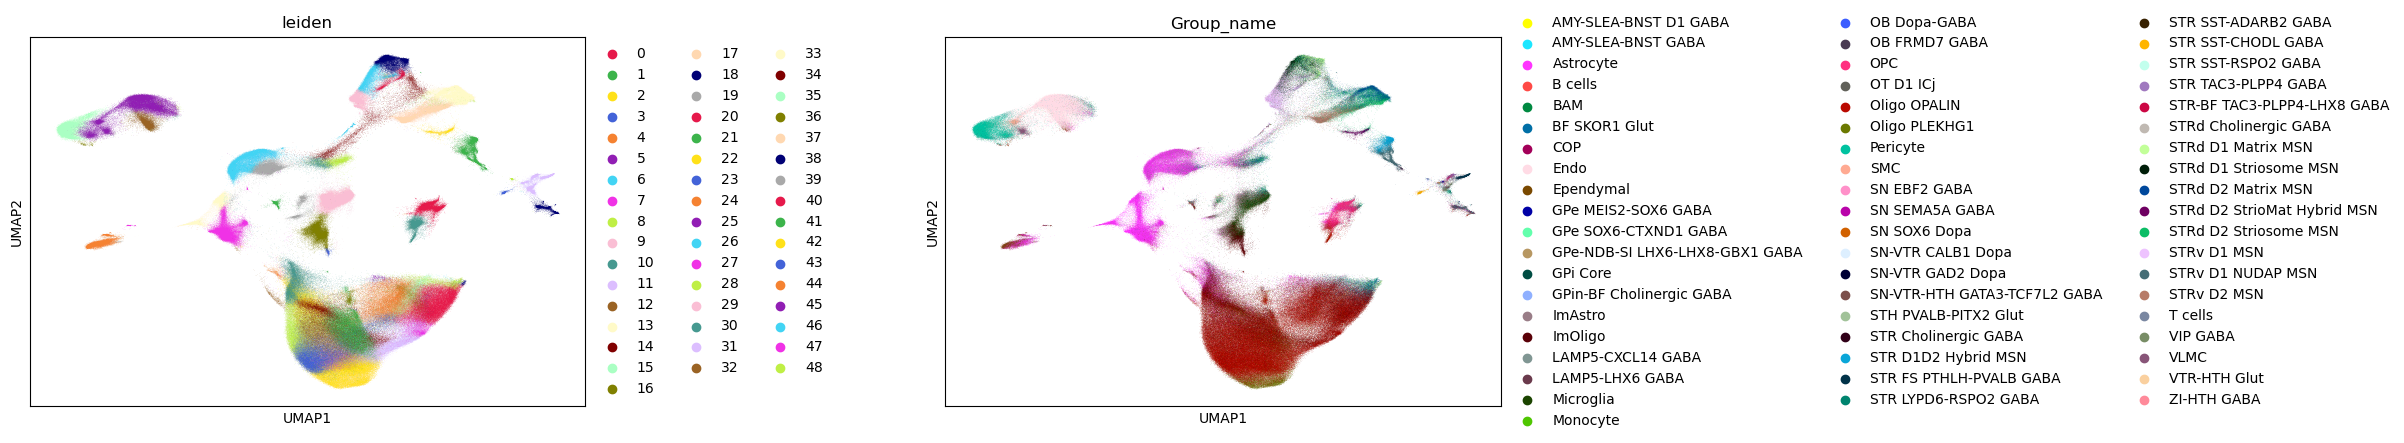

In [110]:
sc.pl.umap(adata, color = ['leiden','Group_name'],wspace = 0.5)

In [132]:
# save the rotated spatial coordinate 
adata.obsm['X_spatial_rotated'] = mapmycell_input.obs[['x','y']].values.copy()

In [133]:
fl_path.replace('.h5ad','_annotated.h5ad')

'/mnt/Z/Lab/Raw_custom_MERFISH_Imaging_data/20250430_XXhBG_2724/analysis_notebooks/scdata_MERFISH_BG_annotated.h5ad'

In [134]:
adata.write_h5ad(fl_path.replace('.h5ad','_annotated.h5ad'), compression='gzip')

In [135]:
adata

AnnData object with n_obs × n_vars = 641405 × 769
    obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'Neighborhood_label', 'Neighborhood_name', 'Neighborhood_bootstrapping_probability', 'Class_label', 'Class_name', 'Class_bootstrapping_probability', 'Subclass_label', 'Subclass_name', 'Subclass_bootstrapping_probability', 'Group_label', 'Group_name', 'Group_bootstrapping_probability', 'Cluster_label', 'Cluster_name', 'Cluster_alias', 'Cluster_bootstrapping_probability'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'Ensemble_ID'
    uns: 'cmap', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'Class_name_colors', 'Subclass_name_colors', 'Group_name_colors'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'X_spatial_rotated'
    obsp: 'connectivities', 'distances'